# 1. Project Title & Introduction


*   Title: "Word Frequency & Word Cloud Analysis using NLP"
*   Description: This project analyzes word frequencies in different text corpora, removes stopwords, and visualizes the results using bar charts and word clouds.


    
    

# 2. Import Necessary Libraries



In [233]:
import pandas as pd
import time
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
import nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# 3. Setup Logging & Stopwords

In [234]:
# Load stopwords once to avoid redundant calls
STOPWORDS = set(stopwords.words('english'))

# 4. Function: Analyzing Word Frequencies

In [235]:
def guess_title(corpus, corpus_name):
    """Analyzes a text corpus, prints most frequent words, and plots results."""

    # Tokenization & Stopword Removal
    words = [word.lower() for word in word_tokenize(corpus) if word.isalnum() and word.lower() not in STOPWORDS]

    # Frequency Distribution
    freq_dist = FreqDist(words)

    # Convert to DataFrame
    df = pd.DataFrame(freq_dist.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

    # Print output properly in Colab
    print(f"Total Unique Words in {corpus_name}: {len(df)}")
    print(f"Top 3 Most Frequent Words in {corpus_name}:\n{df.head(3)}\n")

    # Plot Bar Chart (Static)
    print("\nBAR CHART: ")
    plot_bar_chart(df, corpus_name)

    # Plot Word Cloud
    print("\nWORD CLOUD: ")
    plot_word_cloud(freq_dist, corpus_name)

    # return df  # Returning the DataFrame for further use if needed

# 5. Function: Bar Chart Visualization

In [236]:
def plot_bar_chart(df, corpus_name):
    """Creates a static bar chart using Matplotlib/Seaborn for top 10 frequent words."""
    top_words = df.head(10)  # Select Top 10 words

    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_words['Frequency'], y=top_words['Word'], hue=top_words['Word'], palette='viridis', legend=False)  # Proper fix
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title(f"Top 10 Frequent Words in {corpus_name}")
    plt.show()



# 6. Function: Word Cloud Visualization

In [237]:
def plot_word_cloud(freq_dist, corpus_name):
    """Creates a Word Cloud visualization for frequent words."""
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(freq_dist)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide axes
    plt.title(f"Word Cloud for {corpus_name}", fontsize=14)
    plt.show()

# 7. Define Sample Corpora


In [238]:
# Sample Corpora
corpus_1 = "India, officially the Republic of India, is a country in South Asia. It is the seventh-largest by land area and the most populous nation. Known for its diverse culture, India has 28 states and 8 Union territories, each with unique traditions and languages. India is the world’s largest democracy, with New Delhi as its capital. Major cities include Mumbai, Bangalore, and Kolkata. The economy is one of the fastest-growing, driven by technology, agriculture, and manufacturing. Historically, India was home to the Indus Valley Civilization and witnessed British colonial rule until gaining independence in 1947 under Mahatma Gandhi’s leadership. Today, India plays a key role in space exploration, global trade, and technology."

corpus_2 = "The Voyager program is an American space mission with two probes, Voyager 1 and Voyager 2, launched by NASA in 1977 to explore the outer Solar System. They provided key data on Jupiter, Saturn, Uranus, and Neptune. Voyager 1 is the farthest human-made object and entered interstellar space in 2012. Both probes carry the Golden Record, a message representing human civilization for potential extraterrestrial life. They have discovered planetary rings, active moons, and interstellar particles. Despite aging systems, the probes still transmit data, continuing to expand our understanding of deep space."

corpus_3 = "A black hole is a region of spacetime where gravity is so strong that nothing, not even light, can escape. Formed from collapsing massive stars, black holes were predicted by Einstein’s general relativity. They are classified into stellar, supermassive, and intermediate types. The event horizon marks the point of no return, leading to a singularity of infinite density. Scientists observe black holes through X-ray emissions and gravitational lensing. In 2019, the first black hole image was captured by the Event Horizon Telescope. Black holes remain a key focus in astrophysics, linking gravity, quantum mechanics, and cosmic evolution."



# 8. Run the Analysis on Text Data

Total Unique Words in corpus_1: 62
Top 3 Most Frequent Words in corpus_1:
          Word  Frequency
0        india          6
36  technology          2
46    colonial          1


BAR CHART: 


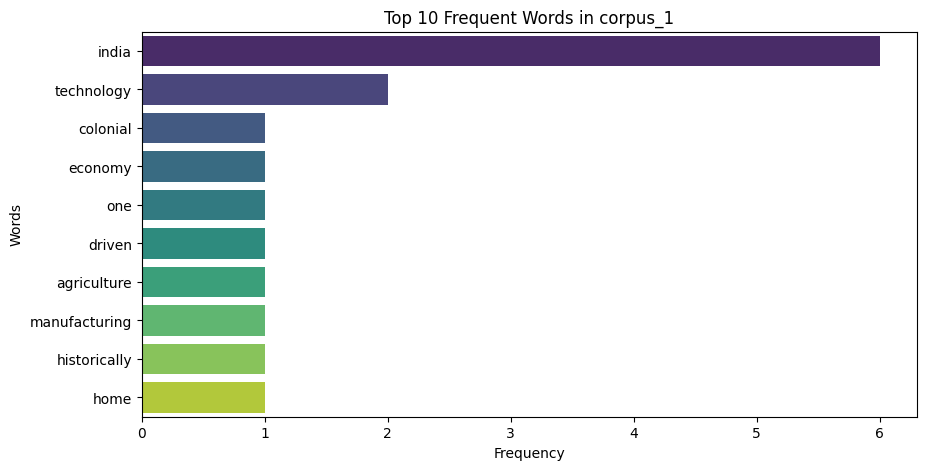


WORD CLOUD: 


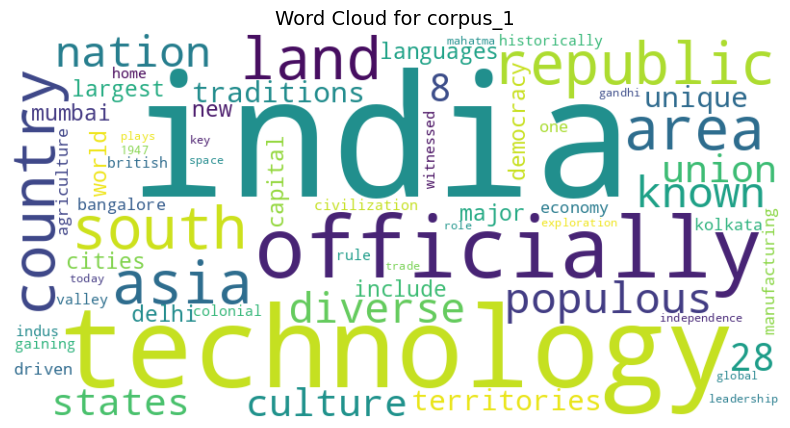

In [239]:
guess_title(corpus_1, "corpus_1")

Total Unique Words in corpus_2: 53
Top 3 Most Frequent Words in corpus_2:
      Word  Frequency
0  voyager          4
6   probes          3
3    space          3


BAR CHART: 


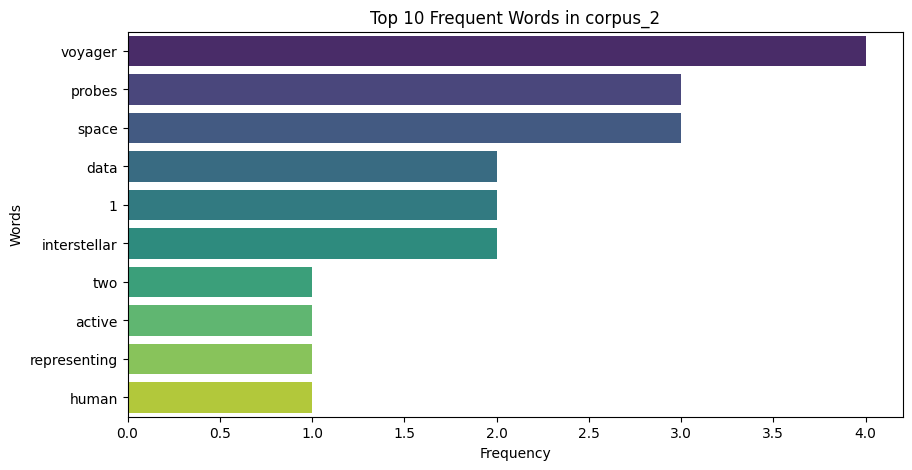


WORD CLOUD: 


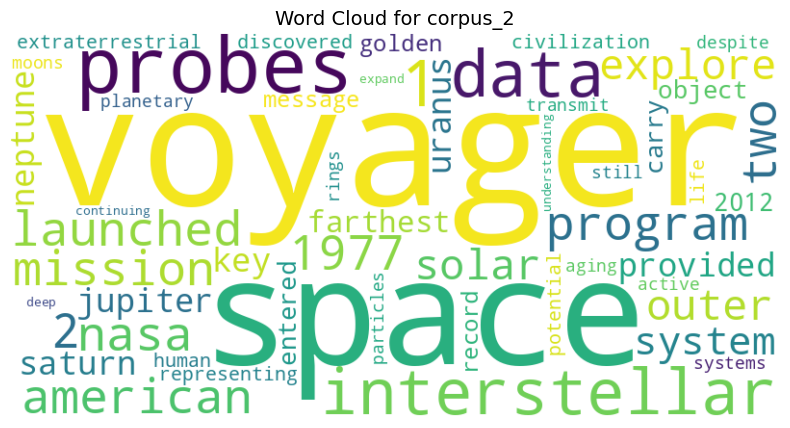

In [240]:
guess_title(corpus_2, "corpus_2")

Total Unique Words in corpus_3: 52
Top 3 Most Frequent Words in corpus_3:
       Word  Frequency
0     black          5
14    holes          3
4   gravity          2


BAR CHART: 


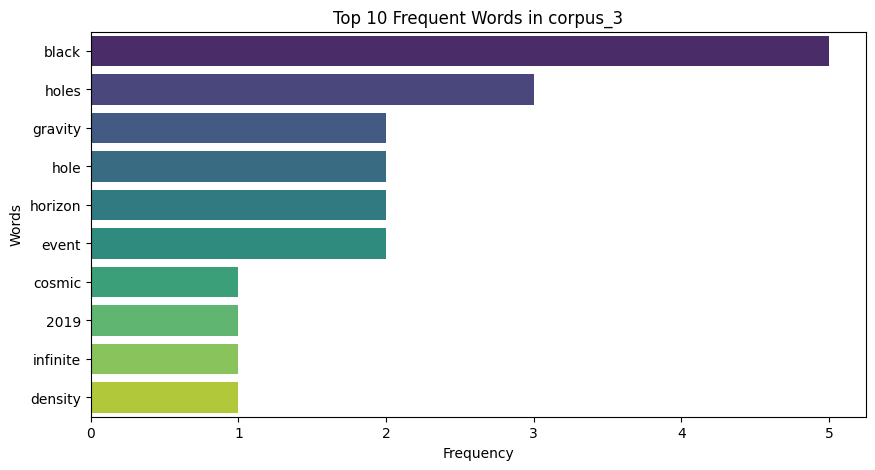


WORD CLOUD: 


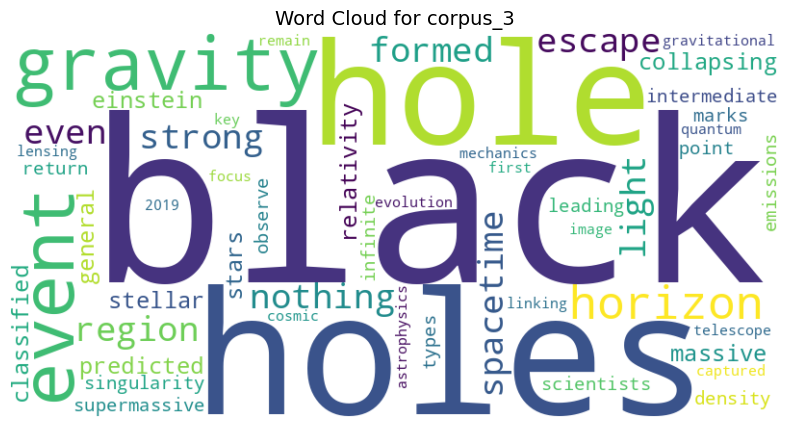

In [241]:
guess_title(corpus_3, "corpus_3")